In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import os
os.environ['R_HOME'] = 'D:/Program Files/R-4.5.0' #@TODO include in some setup file

from simulation_engine.scenarios.iv.binary_iv import BinaryIV
from simulation_engine.scenarios.iv.continuous_iv import ContinuousIV
from simulation_engine.scenarios.iv.base_iv import IVScenario
from simulation_engine.util.plotting_util import PlottingUtil
import pandas as pd
pd.set_option('display.max_columns', None)


#disable warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [ ]:
data = BinaryIV.generate_data_rolling_ate(N_simulations=2000)

binaryIV.data['entropy_U'].describe()

In [ ]:
binaryIV = BinaryIV('IV Dag', data)

# binaryIV.bound_ate_2SLS()
# binaryIV.bound_ate_causaloptim()
# binaryIV.bound_ate_autobound()
binaryIV.bound_ate_entropy(randomize_theta=True)

                     Generalized Linear Model Regression Results                     
Dep. Variable:     entropybounds_bound_width   No. Observations:                  488
Model:                                   GLM   Df Residuals:                      485
Model Family:                       Binomial   Df Model:                            2
Link Function:                         logit   Scale:                          1.0000
Method:                                 IRLS   Log-Likelihood:                -90.393
Date:                       Mon, 12 May 2025   Deviance:                       22.749
Time:                               08:05:45   Pearson chi2:                     21.1
No. Iterations:                            7   Pseudo R-squ. (CS):             0.1950
Covariance Type:                   nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------

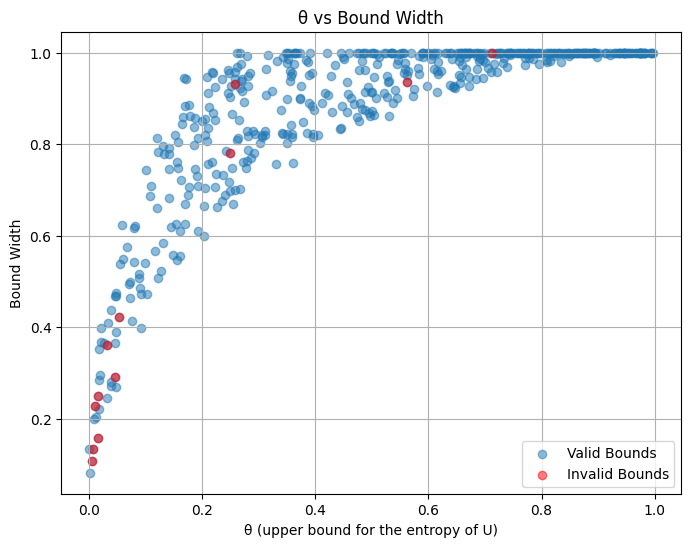

count    500.000000
mean       0.729088
std        0.270703
min       -0.000000
25%        0.532208
50%        0.829749
75%        0.955168
max        0.999988
Name: entropy_U, dtype: float64

In [ ]:
PlottingUtil.randomized_entropyUB_vs_bound_width(binaryIV.data)


Algorithm: causaloptim not found in dataframe columns.
Algorithm: 2SLS not found in dataframe columns.
Algorithm: autobound not found in dataframe columns.
Algorithm: entropybounds
  Fail Rate: 0.00%
  Invalid Rate: 3.80%
  Net Bound Width: 0.5932974317723987


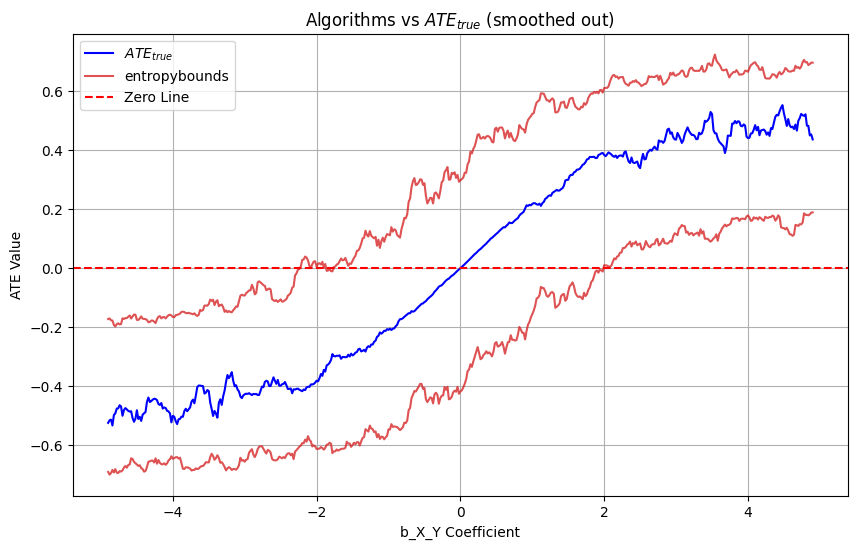

In [ ]:
binaryIV.data
algorithms = ['causaloptim', '2SLS', 'autobound', 'entropybounds']
PlottingUtil.print_bound_statistics(binaryIV.data, algorithms)
PlottingUtil.plot_smoothed_ate_vs_bounds(binaryIV.data, algorithms, 10)


In [25]:
invalids = binaryIV.data[binaryIV.data['causaloptim_bound_valid'] == False]
invalids.mean(numeric_only=True)

seed                         454151.250000
intercept_X                       0.000000
intercept_Y                       0.000000
b_Z                               0.133211
b_U_X                            -0.492470
b_X_Y                             0.400000
b_U_Y                            -0.396647
ATE_true                          0.074479
p_Y1_mean                         0.519508
p_Y0_mean                         0.445029
p_U                               0.593372
p_Z                               0.991120
2SLS_bound_lower                 -1.000000
2SLS_bound_upper                  1.000000
2SLS_bound_width                  2.000000
causaloptim_bound_lower          -0.185045
causaloptim_bound_upper           0.227634
causaloptim_bound_width           0.412680
autobound_bound_lower            -0.515029
autobound_bound_upper             0.454886
autobound_bound_width             0.969915
entropybounds_bound_lower        -0.398496
entropybounds_bound_upper         0.410665
entropyboun